# Task Code 2.4
Biochemistry & Oncology
Proteins structures are known to be strongly connected to their functions. However, at the amino acid level, not all amino acids contribute to structure and function equally. Galardini and colleagues decided to investigate the impact of all possible individual, non synonymous nonsense mutations on the structure and function of protein.
The functional impact was computed as SIFT scores and the structural impact was calculated as FoldX Score (in kCal/mol).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sift_data ="https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"
foldx_data = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"

In [ ]:
df_sift = pd.read_csv(sift_data, sep="\s+")
df_foldx = pd.read_csv(foldx_data, sep="\s+")

In [ ]:
df_sift.head()

,Protein,Amino_Acid,sift_Score
0,A5A607,K60Q,0.197799
1,A5A607,Y56C,0.174970
2,A5A607,Y56S,0.415581
3,A5A630,A16V,0.516738
4,A5A630,A47T,0.387271


In [ ]:
df_foldx.head()

,Protein,Amino_Acid,foldX_Score
0,A5A607,E63D,1.84216
1,A5A607,K60Q,0.51710
2,A5A607,Y56C,0.72870
3,A5A607,Y56S,0.84212
4,P00350,A117S,-0.09854


In [ ]:
print(f"FoldX Column Names: {df_foldx.columns}")
print(f"Sift Column Names: {df_sift.columns}")

FoldX Column Names: Index(['Protein', 'Amino_Acid', 'foldX_Score'], dtype='object')
Sift Column Names: Index(['Protein', 'Amino_Acid', 'sift_Score'], dtype='object')


In [ ]:
col_foldx = df_foldx.columns
col_foldx = [col.strip().lower() for col in col_foldx]
df_foldx.columns = col_foldx
col_sift = df_sift.columns
col_sift = [col.strip().lower() for col in col_sift]
df_sift.columns = col_sift

In [ ]:
print(df_sift.head())
print(df_foldx.head())

  protein amino_acid  sift_score
0  A5A607       K60Q    0.197799
1  A5A607       Y56C    0.174970
2  A5A607       Y56S    0.415581
3  A5A630       A16V    0.516738
4  A5A630       A47T    0.387271
  protein amino_acid  foldx_score
0  A5A607       E63D      1.84216
1  A5A607       K60Q      0.51710
2  A5A607       Y56C      0.72870
3  A5A607       Y56S      0.84212
4  P00350      A117S     -0.09854


In [ ]:
df_foldx["specific_protein_aa"] = df_foldx["protein"] + "_" + df_foldx["amino_acid"]
df_sift["specific_protein_aa"] = df_sift["protein"] + "_" + df_sift["amino_acid"]

In [ ]:
df_foldx.head()

,protein,amino_acid,foldx_score,specific_protein_aa
0,A5A607,E63D,1.84216,A5A607_E63D
1,A5A607,K60Q,0.51710,A5A607_K60Q
2,A5A607,Y56C,0.72870,A5A607_Y56C
3,A5A607,Y56S,0.84212,A5A607_Y56S
4,P00350,A117S,-0.09854,P00350_A117S


In [ ]:
df_sift.head()

,protein,amino_acid,sift_score,specific_protein_aa
0,A5A607,K60Q,0.197799,A5A607_K60Q
1,A5A607,Y56C,0.174970,A5A607_Y56C
2,A5A607,Y56S,0.415581,A5A607_Y56S
3,A5A630,A16V,0.516738,A5A630_A16V
4,A5A630,A47T,0.387271,A5A630_A47T


In [ ]:
df = pd.merge(df_foldx[["specific_protein_aa", "foldx_score" ]], df_sift[["specific_protein_aa","sift_score"]], on="specific_protein_aa")
df.head()

,specific_protein_aa,foldx_score,sift_score
0,A5A607_K60Q,0.51710,0.197799
1,A5A607_Y56C,0.72870,0.174970
2,A5A607_Y56S,0.84212,0.415581
3,P00350_A117S,-0.09854,0.401519
4,P00350_A117T,0.92352,0.282769


In [ ]:
deleterious_mutations = df[(df["sift_score"] < 0.05) & (df["foldx_score"] > 2)]
deleterious_mutations

,specific_protein_aa,foldx_score,sift_score
82,P00350_G48C,2.25298,0.031864
100,P00350_L115F,3.12672,0.028872
102,P00350_L204F,3.31406,0.009560
103,P00350_L208R,4.38690,0.027592
209,P00363_I150F,9.18496,0.048688
...,...,...,...
75267,Q6BEX0_V211F,12.81140,0.013334
75277,Q6BF16_A97V,2.52316,0.039486
75281,Q6BF16_G80S,4.58514,0.000000
75311,Q6BF17_G250C,3.59832,0.028912


In [ ]:
deleterious_mutations["original_aa"] = deleterious_mutations["specific_protein_aa"].apply(lambda x: x.split("_")[1][0])


<ipython-input-14-5500840f85ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deleterious_mutations["original_aa"] = deleterious_mutations["specific_protein_aa"].apply(lambda x: x.split("_")[1][0])


In [ ]:
deleterious_mutations.head()

,specific_protein_aa,foldx_score,sift_score,original_aa
82,P00350_G48C,2.25298,0.031864,G
100,P00350_L115F,3.12672,0.028872,L
102,P00350_L204F,3.31406,0.009560,L
103,P00350_L208R,4.38690,0.027592,L
209,P00363_I150F,9.18496,0.048688,I


In [ ]:
deleterious_mutations["original_aa"].value_counts()

,count
original_aa,
G,1307
L,739
A,640
P,470
V,380
R,227
I,212
Y,172
D,171


# Brief Description of the Most Impactful Amino Acid on structure and function
The analysis of deleterious mutations reveals Glycine (G) as the most impacted amino acid due to its small size and flexibility, which are crucial for protein loops and active sites. Mutating Glycine often disrupts both structure and function, leading to instability. Other frequently affected amino acids include Leucine (L), Alanine (A), Proline (P), and Valine (V), all of which play key roles in protein stability and hydrophobic core interactions.

Hydrophobic residues (L, A, V) help maintain structural integrity, while Proline’s rigidity is essential for protein turns. Mutations in these residues destabilize folding and impact function. Visualization through bar plots and pie charts confirms that mutations in flexible or structurally crucial regions are more disruptive.

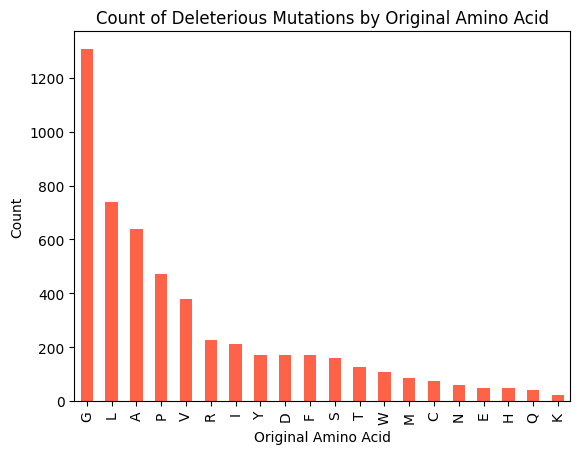

In [ ]:
deleterious_mutations["original_aa"].value_counts().plot(kind="bar",color="tomato")
plt.xlabel("Original Amino Acid")
plt.ylabel("Count")
plt.title("Count of Deleterious Mutations by Original Amino Acid")
plt.show()

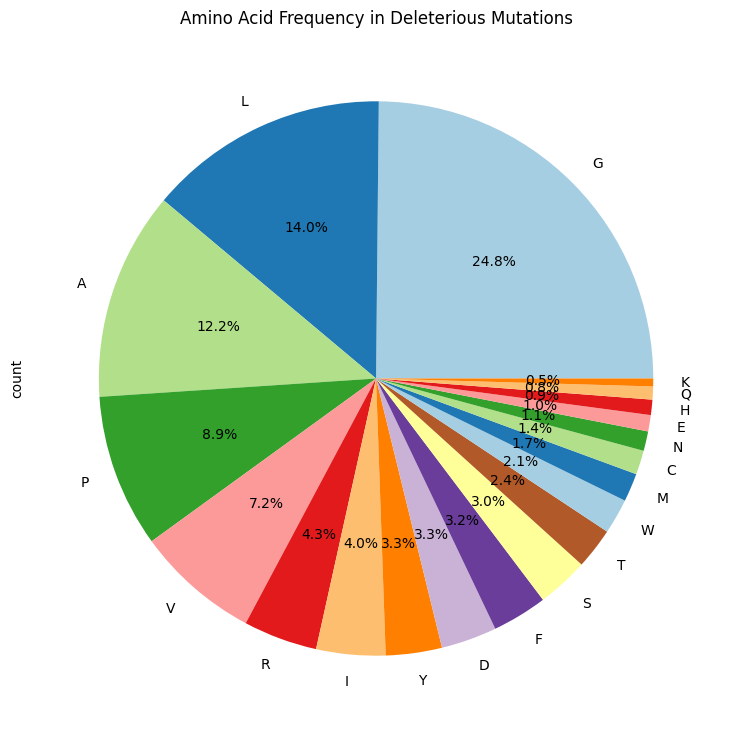

In [ ]:
deleterious_mutations["original_aa"].value_counts().plot(kind="pie",
                                                         autopct='%1.1f%%',
                                                         colors=plt.cm.Paired.colors,
                                                         figsize=(9,9))
plt.title("Amino Acid Frequency in Deleterious Mutations")
plt.show()